Implementation of DT Classifiers and Regressors & RF Classifiers and Regressors.

In [1]:
%matplotlib inline
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

In [30]:
df = pd.read_csv('D:/DS/analytics_edge/stevens.csv')

In [3]:
pandas_profiling.ProfileReport(df)

Number of variables,9
Number of observations,566
Total Missing (%),0.0%
Total size in memory,39.9 KiB
Average record size in memory,72.1 B
Numeric,1
Categorical,5
Boolean,2
Date,0
Text (Unique),1
Rejected,0


In [4]:
df.Issue.unique()

array(['EconomicActivity', 'JudicialPower', 'CriminalProcedure',
       'DueProcess', 'FederalismAndInterstateRelations', 'CivilRights',
       'FirstAmendment', 'FederalTaxation', 'Unions', 'Privacy',
       'Attorneys'], dtype=object)

In [5]:
df.Petitioner.unique()

array(['BUSINESS', 'CITY', 'EMPLOYEE', 'AMERICAN.INDIAN',
       'INJURED.PERSON', 'GOVERNMENT.OFFICIAL', 'OTHER', 'STATE', 'US',
       'CRIMINAL.DEFENDENT', 'EMPLOYER', 'POLITICIAN'], dtype=object)

In [6]:
df.Respondent.unique()

array(['BUSINESS', 'CITY', 'CRIMINAL.DEFENDENT', 'EMPLOYEE', 'EMPLOYER',
       'AMERICAN.INDIAN', 'INJURED.PERSON', 'GOVERNMENT.OFFICIAL',
       'OTHER', 'POLITICIAN', 'STATE', 'US'], dtype=object)

In [7]:
df.LowerCourt.unique()

array(['liberal', 'conser'], dtype=object)

In [31]:
df['CircuitN'], circuit_names = pd.factorize(df['Circuit'])
df['IssueN'], issue_names = pd.factorize(df['Issue'])
df['PetitionerN'], petitioner_names = pd.factorize(df['Petitioner'])
df['RespondentN'], respondent_names = pd.factorize(df['Respondent'])
df['LowerCourtN'], lowercourt_names = pd.factorize(df['LowerCourt'])

In [32]:
df.head()

,Docket,Term,Circuit,Issue,Petitioner,Respondent,LowerCourt,Unconst,Reverse,CircuitN,IssueN,PetitionerN,RespondentN,LowerCourtN
0,93-1408,1994,2nd,EconomicActivity,BUSINESS,BUSINESS,liberal,0,1,0,0,0,0,0
1,93-1577,1994,9th,EconomicActivity,BUSINESS,BUSINESS,liberal,0,1,1,0,0,0,0
2,93-1612,1994,5th,EconomicActivity,BUSINESS,BUSINESS,liberal,0,1,2,0,0,0,0
3,94-623,1994,1st,EconomicActivity,BUSINESS,BUSINESS,conser,0,1,3,0,0,0,1
4,94-1175,1995,7th,JudicialPower,BUSINESS,BUSINESS,conser,0,1,4,1,0,0,1


In [33]:
print(df.CircuitN.unique())
print(df.IssueN.unique())
print(df.PetitionerN.unique())
print(df.RespondentN.unique())
print(df.LowerCourtN.unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
[ 0  1  2  3  4  5  6  7  8  9 10]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[0 1]


In [34]:
X = df[['CircuitN', 'IssueN','PetitionerN', 'RespondentN', 'LowerCourtN', 'Unconst']]

In [35]:
X.isnull().any()

CircuitN       False
IssueN         False
PetitionerN    False
RespondentN    False
LowerCourtN    False
Unconst        False
dtype: bool

In [36]:
y = df[['Reverse']]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

#### Decision Tree Classifier

In [61]:
dtc = DecisionTreeClassifier(criterion = 'gini', random_state = 42, max_depth = 3)

In [62]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [63]:
y_pred_dtc = dtc.predict(X_test)

#### Evaluation Metrics

In [64]:
accuracy_score(y_test, y_pred_dtc)

0.6197183098591549

In [65]:
print(confusion_matrix(y_test, y_pred_dtc))

[[47 18]
 [36 41]]


In [66]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.57      0.72      0.64        65
           1       0.69      0.53      0.60        77

   micro avg       0.62      0.62      0.62       142
   macro avg       0.63      0.63      0.62       142
weighted avg       0.64      0.62      0.62       142



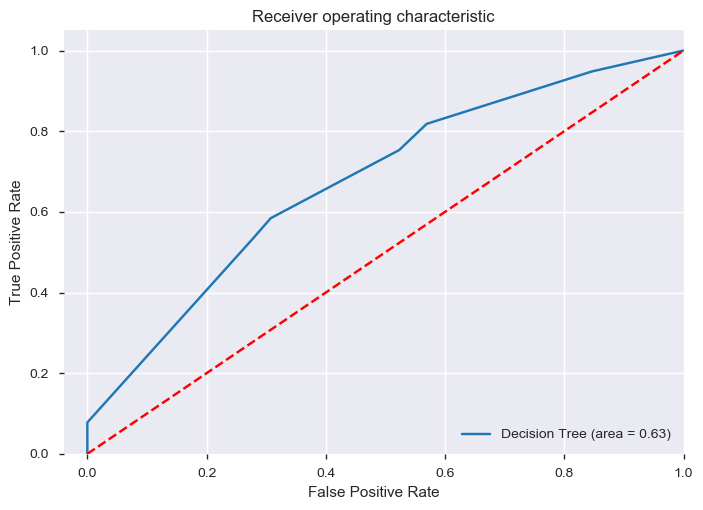

In [67]:
dtc_roc_auc = roc_auc_score(y_test, y_pred_dtc)
fpr, tpr, thresholds = roc_curve(y_test, dtc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dtc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.04, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### Random Forest Classifier

In [45]:
rfm = RandomForestClassifier(n_jobs = 10, random_state = 42)

In [46]:
rfm.fit(X_train, y_train)

C:\Users\Atheesh Krishnan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Atheesh Krishnan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=10,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [47]:
y_pred_rfm = rfm.predict(X_test)

In [48]:
accuracy_score(y_test, y_pred_rfm)

0.6197183098591549

In [49]:
print(confusion_matrix(y_test, y_pred_rfm))

[[39 26]
 [28 49]]


In [50]:
print(classification_report(y_test, y_pred_rfm))

              precision    recall  f1-score   support

           0       0.58      0.60      0.59        65
           1       0.65      0.64      0.64        77

   micro avg       0.62      0.62      0.62       142
   macro avg       0.62      0.62      0.62       142
weighted avg       0.62      0.62      0.62       142



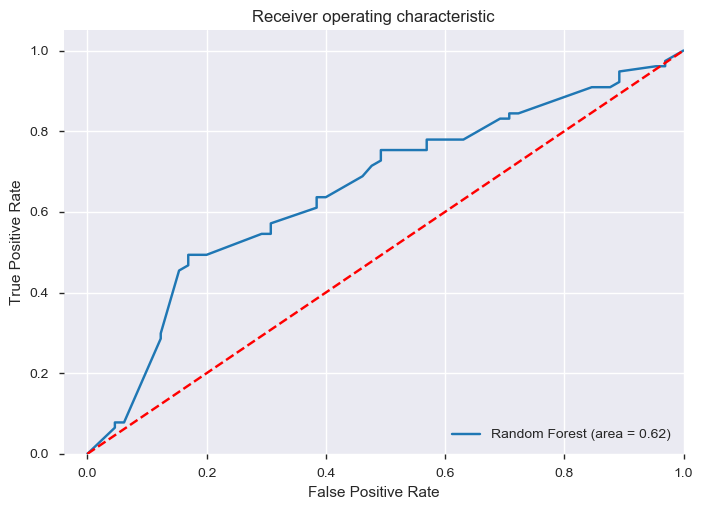

In [51]:
rfm_roc_auc = roc_auc_score(y_test, y_pred_rfm)
fpr, tpr, thresholds = roc_curve(y_test, rfm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rfm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.04, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()